In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
petal_df = df[['petal length (cm)', 'petal width (cm)']]
petal_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


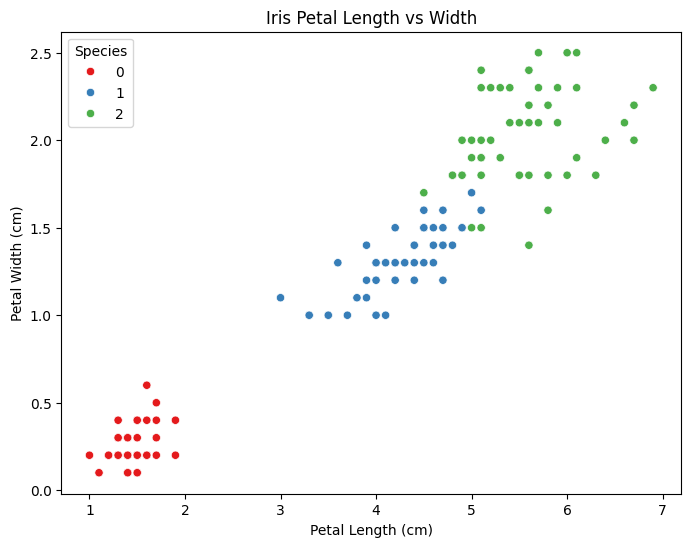

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=petal_df['petal length (cm)'],
    y=petal_df['petal width (cm)'],
    hue=df['target'],
    palette='Set1'
)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Petal Length vs Width')
plt.legend(title='Species')
plt.show()

In [5]:
print("Petal feature ranges before scaling:")
print(petal_df.describe())

scaler = MinMaxScaler()
petal_scaled = scaler.fit_transform(petal_df)
petal_scaled_df = pd.DataFrame(petal_scaled, columns=petal_df.columns)

print("\nPetal feature ranges after MinMax scaling:")
print(petal_scaled_df.describe())

Petal feature ranges before scaling:
       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            3.758000          1.199333
std             1.765298          0.762238
min             1.000000          0.100000
25%             1.600000          0.300000
50%             4.350000          1.300000
75%             5.100000          1.800000
max             6.900000          2.500000

Petal feature ranges after MinMax scaling:
       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            0.467458          0.458056
std             0.299203          0.317599
min             0.000000          0.000000
25%             0.101695          0.083333
50%             0.567797          0.500000
75%             0.694915          0.708333
max             1.000000          1.000000


In [6]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(petal_scaled_df)
petal_scaled_df['cluster'] = clusters
petal_scaled_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


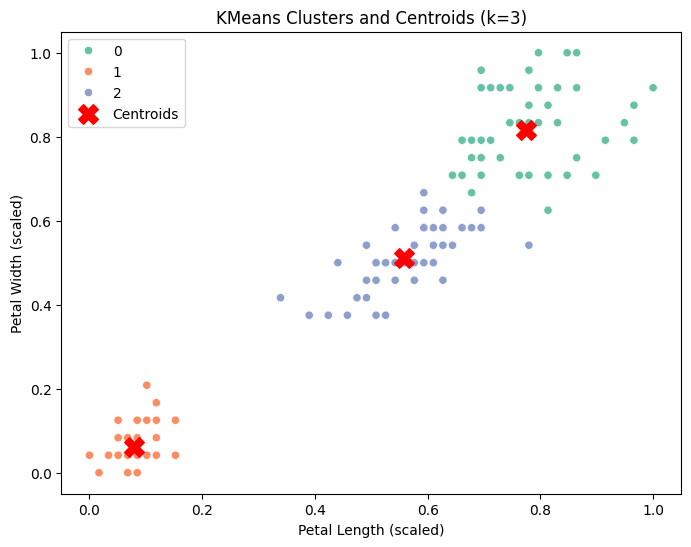

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=petal_scaled_df['petal length (cm)'],
    y=petal_scaled_df['petal width (cm)'],
    hue=petal_scaled_df['cluster'],
    palette='Set2'
)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=200, marker='X', label='Centroids'
)
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('KMeans Clusters and Centroids (k=3)')
plt.legend()
plt.show()

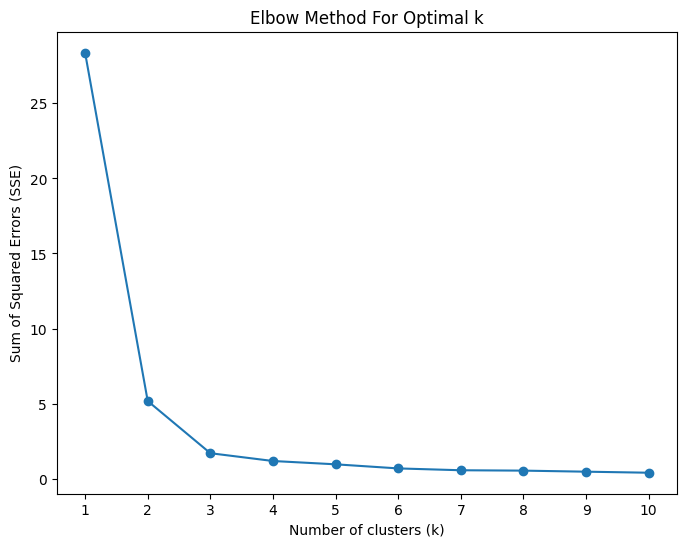

In [8]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(petal_scaled_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.show()